## Trying Various CNN models on MNIST Dataset

In [12]:
## Importing modules and data
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

### Preprocessing

In [0]:

# input image dimensions
img_rows, img_cols = 28, 28


In [0]:
batch_size = 128
num_classes = 10
epochs = 12


In [16]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [17]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Model 1 - Kernel Size - 3x3  with  3 Layers 


In [18]:
### Model 1
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


W0710 06:22:10.534122 139629505636224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 06:22:10.589409 139629505636224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 06:22:10.599265 139629505636224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0710 06:22:10.693979 139629505636224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0710 06:22:10.761312 139629505636224 deprecation_wrapp

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 454s 8ms/step - loss: 0.1849 - acc: 0.9446 - val_loss: 0.0450 - val_acc: 0.9857
Epoch 2/12
60000/60000 [==============================] - 452s 8ms/step - loss: 0.0429 - acc: 0.9871 - val_loss: 0.0310 - val_acc: 0.9897
Epoch 3/12
60000/60000 [==============================] - 451s 8ms/step - loss: 0.0268 - acc: 0.9911 - val_loss: 0.0288 - val_acc: 0.9896
Epoch 4/12
60000/60000 [==============================] - 448s 7ms/step - loss: 0.0177 - acc: 0.9946 - val_loss: 0.0357 - val_acc: 0.9886
Epoch 5/12
60000/60000 [==============================] - 448s 7ms/step - loss: 0.0111 - acc: 0.9964 - val_loss: 0.0304 - val_acc: 0.9906
Epoch 6/12
60000/60000 [==============================] - 449s 7ms/step - loss: 0.0080 - acc: 0.9975 - val_loss: 0.0317 - val_acc: 0.9901
Epoch 7/12
60000/60000 [==============================] - 449s 7ms/step - loss: 0.0061 - acc: 0.9982 - val_loss: 0.0354 - 

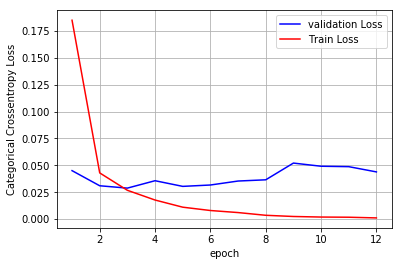

In [19]:

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

#list of epoch numbers
x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Observation


1.   In this model I have used 3 ConvNets.
2.   Then Max Pooling of stride=2.
3.   And then Classification is performed with dense layers of 128 followed by a final softmax layer.
4.   The Test Accuracy is 99.11 % , which is quite good

### From error plot -
1.   In the starting epochs (till 2 )  train error was high, then started decreasing after 2 epochs and goes on decreasing.
2.   The cross validation error shows not much variation in error, it remains between 0.025 and 0.050 only.



### *For the above model accuracy was good, lets try out if we use 5 layers with Maxpooling and droupouts.* 
### Model 2 - Kernel size 2x2 with 5 Layers with Maxpooling and dropouts.

In [20]:
### Model 2
model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, kernel_size=(2,2)))
model.add(Conv2D(64, kernel_size=(2,2)))
model.add(Conv2D(64, kernel_size=(2,2)))
model.add(Conv2D(128,kernel_size=(2,2)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

W0710 07:52:33.343074 139629505636224 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 474s 8ms/step - loss: 0.2764 - acc: 0.9143 - val_loss: 0.0764 - val_acc: 0.9766
Epoch 2/12
60000/60000 [==============================] - 474s 8ms/step - loss: 0.1097 - acc: 0.9678 - val_loss: 0.0606 - val_acc: 0.9808
Epoch 3/12
60000/60000 [==============================] - 474s 8ms/step - loss: 0.0818 - acc: 0.9751 - val_loss: 0.0455 - val_acc: 0.9862
Epoch 4/12
60000/60000 [==============================] - 475s 8ms/step - loss: 0.0680 - acc: 0.9791 - val_loss: 0.0422 - val_acc: 0.9872
Epoch 5/12
60000/60000 [==============================] - 473s 8ms/step - loss: 0.0602 - acc: 0.9818 - val_loss: 0.0704 - val_acc: 0.9827
Epoch 6/12
60000/60000 [==============================] - 472s 8ms/step - loss: 0.0511 - acc: 0.9845 - val_loss: 0.0451 - val_acc: 0.9854
Epoch 7/12
60000/60000 [==============================] - 472s 8ms/step - loss: 0.0462 - acc: 0.9866 - val_loss: 0.0395 - 

### Error Plot

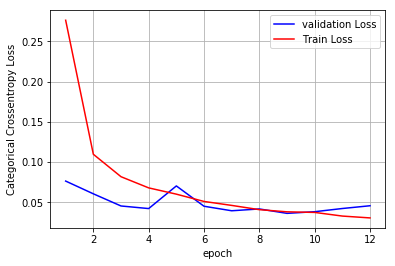

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

#list of epoch numbers
x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Observation - For the above model we tried 5 layers along with Maxpooling and droupout and accuracy is equal to 98.9 % which is lesser than our earlier model, this may have happen due to the reduced  kernel size of 2x2.

### From error plot-
1. In the starting epochs (till 2 ) train error was high, then started decreasing after 2 epochs and goes on decreasing
2. The cross validation error shows not much variation in error, the error remains low only.



#### *Lets now try with modern optimization like Batchnormalization, Maxpooling, Dropouts all in a single model.* 

### Model 3 - Kernel Size 4x4 - with 6 layers


In [23]:
### Model 3
from keras.layers.normalization import BatchNormalization
model = Sequential()

model.add(Conv2D(32,kernel_size=4,activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=4,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=4,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64,kernel_size=4,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=4,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=4,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


W0710 09:27:36.083409 139629505636224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 290s 5ms/step - loss: 0.2392 - acc: 0.9280 - val_loss: 0.0638 - val_acc: 0.9797
Epoch 2/12
60000/60000 [==============================] - 284s 5ms/step - loss: 0.0647 - acc: 0.9812 - val_loss: 0.0466 - val_acc: 0.9853
Epoch 3/12
60000/60000 [==============================] - 285s 5ms/step - loss: 0.0452 - acc: 0.9863 - val_loss: 0.0329 - val_acc: 0.9895
Epoch 4/12
60000/60000 [==============================] - 288s 5ms/step - loss: 0.0364 - acc: 0.9892 - val_loss: 0.0205 - val_acc: 0.9937
Epoch 5/12
60000/60000 [==============================] - 286s 5ms/step - loss: 0.0308 - acc: 0.9908 - val_loss: 0.0210 - val_acc: 0.9936
Epoch 6/12
60000/60000 [==============================] - 287s 5ms/step - loss: 0.0262 - acc: 0.9921 - val_loss: 0.0207 - val_acc: 0.9946
Epoch 7/12
60000/60000 [==============================] - 286s 5ms/step - loss: 0.0244 - acc: 0.9928 - val_loss: 0.0184 - 

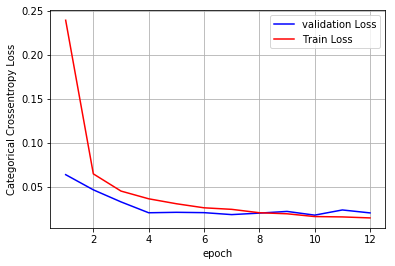

In [24]:

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

#list of epoch numbers
x = list(range(1, epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Observation -
1. Modern optimization works great, it give a test accuracy of 99.41% which is better from our model 1 and 

### From error plot-
1. In the starting epochs (till 2 ) train error was high, then started decreasing after 2 epochs and goes on decreasing
2.The cross validation error shows a little variation in error at starting epochs but then it remains low only.

### Conclusion

In [26]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Filters", "Layers", "Model", "Activation", "Epoch", "Accuracy"]
x.add_row(["3 x 3", "3", "Convnet", "Relu", 12, "99.11%"])
x.add_row(["2 x 2", "5" ,"Convnet", "Relu", 12, "98.9%"])
x.add_row(["4 x 4", "6" ,"Convnet", "Relu", 12, "99.36%"])
print(x)

+---------+--------+---------+------------+-------+----------+
| Filters | Layers |  Model  | Activation | Epoch | Accuracy |
+---------+--------+---------+------------+-------+----------+
|  3 x 3  |   3    | Convnet |    Relu    |   12  |  99.11%  |
|  2 x 2  |   5    | Convnet |    Relu    |   12  |  98.9%   |
|  4 x 4  |   6    | Convnet |    Relu    |   12  |  99.36%  |
+---------+--------+---------+------------+-------+----------+
